# Machine Learning Lab

# Simran Kaur

# 311443

# Lab 5

# Exercise 1: Backward search for variable selection 

Importing required libraries

In [362]:
import pandas as pd
import numpy as np

Reading CSV file

In [363]:
f = pd.read_csv('bank.csv', sep = ";")
f

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


To convert non-numerical values, I have first taken all possible values occuring in each column and then used a dictionary to give them numerical values.

In [365]:
f["job"].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [366]:
f["marital"].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [369]:
f["education"].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [370]:
f["contact"].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [371]:
f["month"].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [372]:
f["poutcome"].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

Giving numerical values to the entries of columns

In [373]:
values = {"no":0, "yes":1, "management":2, "blue-collar":3, "technician":4, "admin.":5, "services":6,"retired":7, "self-employed":8
         , "entrepreneur":9, "unemployed":10, "housemaid":11, "student":12, "unknown":13, "married":2, "single":3, "divorced":4
         ,"secondary":2, "tertiary":3, "primary":4, "cellular":2, "telephone":3, "jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6
         , "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12, "failure":2, "other":3, "success":4}
bank = f.replace(values)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,2,4,0,1787,0,0,2,19,10,79,1,-1,0,13,0
1,33,6,2,2,0,4789,1,1,2,11,5,220,1,339,4,2,0
2,35,2,3,3,0,1350,1,0,2,16,4,185,1,330,1,2,0
3,30,2,2,3,0,1476,1,1,13,3,6,199,4,-1,0,13,0
4,59,3,2,2,0,0,1,0,13,5,5,226,1,-1,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,6,2,2,0,-333,1,0,2,30,7,329,5,-1,0,13,0
4517,57,8,2,3,1,-3313,1,1,13,9,5,153,1,-1,0,13,0
4518,57,4,2,2,0,295,0,0,2,19,8,151,11,-1,0,13,0
4519,28,3,2,2,0,1137,0,0,2,6,2,129,4,211,3,3,0


Checking if the rows of the dataframe has any missing or NA values

In [377]:
is_NA = bank.isna()
row_has_NA = is_NA.any(axis=1)
rows_with_NA = bank[row_has_NA]
print(rows_with_NA)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


There are no such rows

This function is for splitting the dataset into 80% training and 20% test set.

In [378]:
def split(file):
    r, c = np.shape(file)
    size = int(0.8*r)
    train = file.iloc[0:size]
    test = file.iloc[size :]
    return train, test

As we can see some of the columns in our dataframe has very low range values and some have values in a bigger range. This means we need to normalize our dataframe. For this we will first make a copy of our dataframe excluding the last column which we do not want to normalize as it contain classes and normalize rest of the dataframe.

In [379]:
temp_bank = bank.iloc[:, :-1]
temp_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,2,4,0,1787,0,0,2,19,10,79,1,-1,0,13
1,33,6,2,2,0,4789,1,1,2,11,5,220,1,339,4,2
2,35,2,3,3,0,1350,1,0,2,16,4,185,1,330,1,2
3,30,2,2,3,0,1476,1,1,13,3,6,199,4,-1,0,13
4,59,3,2,2,0,0,1,0,13,5,5,226,1,-1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,6,2,2,0,-333,1,0,2,30,7,329,5,-1,0,13
4517,57,8,2,3,1,-3313,1,1,13,9,5,153,1,-1,0,13
4518,57,4,2,2,0,295,0,0,2,19,8,151,11,-1,0,13
4519,28,3,2,2,0,1137,0,0,2,6,2,129,4,211,3,3


In [380]:
nor_bank =(temp_bank - temp_bank.mean())/temp_bank.std()

In [125]:
nor_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.056153,1.972917,-0.716234,0.432252,-0.130744,0.121058,-1.141925,-0.424709,-0.661624,0.374011,1.611695,-0.711782,-0.576766,-0.407173,-0.320377,0.467778
1,-0.772497,0.478228,-0.716234,-0.481144,-0.130744,1.118521,0.875521,2.354032,-0.661624,-0.595961,-0.490576,-0.169175,-0.576766,2.988713,2.041508,-2.262307
2,-0.583394,-1.016461,0.721640,-0.024446,-0.130744,-0.024142,0.875521,-0.424709,-0.661624,0.010271,-0.911031,-0.303865,-0.576766,2.898822,0.270094,-2.262307
3,-1.056153,-1.016461,-0.716234,-0.024446,-0.130744,0.017724,0.875521,2.354032,1.551845,-1.565932,-0.070122,-0.249989,0.387925,-0.407173,-0.320377,0.467778
4,1.685850,-0.642789,-0.716234,-0.481144,-0.130744,-0.472701,0.875521,-0.424709,1.551845,-1.323439,-0.490576,-0.146086,-0.576766,-0.407173,-0.320377,0.467778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772497,0.478228,-0.716234,-0.481144,-0.130744,-0.583345,0.875521,-0.424709,-0.661624,1.707721,0.350332,0.250287,0.709488,-0.407173,-0.320377,0.467778
4517,1.496746,1.225572,-0.716234,-0.024446,7.646823,-1.573497,0.875521,2.354032,1.551845,-0.838453,-0.490576,-0.427010,-0.576766,-0.407173,-0.320377,0.467778
4518,1.496746,-0.269117,-0.716234,-0.481144,-0.130744,-0.374682,-1.141925,-0.424709,-0.661624,0.374011,0.770786,-0.434706,2.638868,-0.407173,-0.320377,0.467778
4519,-1.245256,-0.642789,-0.716234,-0.481144,-0.130744,-0.094914,-1.141925,-0.424709,-0.661624,-1.202193,-1.751939,-0.519368,0.387925,1.710262,1.451037,-2.014118


To this normalized dataframe, we will now add the last column.

In [381]:
nor_bank["y"] = bank.iloc[:, -1]
nor_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.056153,1.972917,-0.716234,0.432252,-0.130744,0.121058,-1.141925,-0.424709,-0.661624,0.374011,1.611695,-0.711782,-0.576766,-0.407173,-0.320377,0.467778,0
1,-0.772497,0.478228,-0.716234,-0.481144,-0.130744,1.118521,0.875521,2.354032,-0.661624,-0.595961,-0.490576,-0.169175,-0.576766,2.988713,2.041508,-2.262307,0
2,-0.583394,-1.016461,0.721640,-0.024446,-0.130744,-0.024142,0.875521,-0.424709,-0.661624,0.010271,-0.911031,-0.303865,-0.576766,2.898822,0.270094,-2.262307,0
3,-1.056153,-1.016461,-0.716234,-0.024446,-0.130744,0.017724,0.875521,2.354032,1.551845,-1.565932,-0.070122,-0.249989,0.387925,-0.407173,-0.320377,0.467778,0
4,1.685850,-0.642789,-0.716234,-0.481144,-0.130744,-0.472701,0.875521,-0.424709,1.551845,-1.323439,-0.490576,-0.146086,-0.576766,-0.407173,-0.320377,0.467778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772497,0.478228,-0.716234,-0.481144,-0.130744,-0.583345,0.875521,-0.424709,-0.661624,1.707721,0.350332,0.250287,0.709488,-0.407173,-0.320377,0.467778,0
4517,1.496746,1.225572,-0.716234,-0.024446,7.646823,-1.573497,0.875521,2.354032,1.551845,-0.838453,-0.490576,-0.427010,-0.576766,-0.407173,-0.320377,0.467778,0
4518,1.496746,-0.269117,-0.716234,-0.481144,-0.130744,-0.374682,-1.141925,-0.424709,-0.661624,0.374011,0.770786,-0.434706,2.638868,-0.407173,-0.320377,0.467778,0
4519,-1.245256,-0.642789,-0.716234,-0.481144,-0.130744,-0.094914,-1.141925,-0.424709,-0.661624,-1.202193,-1.751939,-0.519368,0.387925,1.710262,1.451037,-2.014118,0


We will convert this dataframe to numpy matrix with a bias column added for the linear combination in the logistic regression part.

In [382]:
nor_bank_matrix = nor_bank.to_numpy()
bias_col = np.ones(shape=(nor_bank_matrix.shape[0],1))
nor_bank_matrix = np.append(bias_col,nor_bank_matrix,axis=1)
nor_bank_matrix_X = nor_bank_matrix[:, :-1]
nor_bank_matrix_Y = nor_bank_matrix[:, -1]

Implementing Logistic Regression with mini batch gradient ascent

In [495]:
def sigmoid(X, beta):
    sig = (1/(1 + np.exp(-(np.dot(X, beta))))).reshape(-1,1)
    return sig

def log_likelihood(X, Y, beta):
    s = 0
    for i in range(len(X)):
        s += Y[i]*np.dot(X[i], beta) - np.log(1 + np.exp(np.dot(X[i], beta)))
    return s[0]

def log_likelihood_grad(X, Y, beta):
    return np.dot(X.T, np.subtract(Y , sigmoid(X, beta)))

def mini_batch_gradient_ascent(X, Y, i_max, alpha):
    m, n = np.shape(X)
    beta = np.zeros((n,1))
    beta_new = np.zeros((n, 1))
    batch_size = 50
    l = int(m/batch_size)
    for i in range(l):
        for k in range(i_max):
            beta_new = beta + alpha*(log_likelihood_grad(X[i:(i+1)*batch_size][:], Y[i:(i+1)*batch_size][:], beta))
        beta = beta_new
    return beta_new
              

Backward search for variable selection using AIC:

min AIC = −2logL + 2p

We need to minimize AIC, In the backward search we will take each variable and remove one by one from the set of variables and check for the AIC. The rule is that if by removing a variable the AIC decreases then we will remove that variable and this process will continue until the AIC doesnot decrease anymore after removing a variable.

In [391]:
def AIC(X, Y, beta):
    p = X.shape[1]
    return -2*(log_likelihood(X, Y, beta)) + 2*p

def backward_search(X, Y):
    i_max = 100
    alpha = 10**(-5)
    beta = mini_batch_gradient_ascent(X, Y, i_max, alpha)
    col_used = [i for i in range(X.shape[1])]
    min_ = []
    improvement = True
    begin_AIC = AIC(X, Y, beta)
    while(improvement):
        n = X.shape[1]
        for i in range(n):
            l = [k for k in range(n) if k!= i]
            beta_ = mini_batch_gradient_ascent(X[:, l], Y, i_max, alpha)
            new_AIC = AIC(X[:, l], Y, beta_)
            min_.append(new_AIC)
        if min(min_) < begin_AIC:
            aic, val =  min((v, i) for (i, v) in enumerate(min_))
            begin_AIC = aic
            col_used = np.delete(col_used, val)
            X = np.delete(X, val,1)
            min_ = []
        else:
            improvement = False
    return col_used

This function extracts the training and test sets features and target.

In [392]:
def Extract(f, col_name):
    train, test = split(f)
    r, c = np.shape(train)
    x_train = train.loc[:, train.columns != col_name]
    x_train = x_train.to_numpy()
    bias_column1 = np.ones(shape=(r,1))
    X_train = np.append(bias_column1,x_train,axis=1)
    y_train = train.loc[:, train.columns == col_name]
    Y_train = y_train.to_numpy()
    k, l = np.shape(test)
    x_test = test.loc[:, test.columns != col_name]
    x_test = x_test.to_numpy()
    bias_column2 = np.ones(shape=(k,1))
    X_test = np.append(bias_column2,x_test,axis=1)
    y_test = test.loc[:, test.columns == col_name]
    Y_test = y_test.to_numpy()
    return X_train, Y_train, X_test, Y_test

After running backward search on initial set of variables, we get the variables that gives good AIC score.

In [393]:
X_train, Y_train, X_test, Y_test = Extract(nor_bank, "y")
cols = backward_search(X_train, Y_train)

In [394]:
cols

array([ 0,  7,  8,  9, 12, 15, 16])

Keeping the same variables in the test set and running mini batch gradient ascent on it we will get predictions for the test set that we can compare with the actual values to find the error.

In [397]:
train_feature = X_train[:, cols]
b = mini_batch_gradient_ascent(train_feature, Y_train, 500, 10**(-5))
test_feature = X_test[:, cols]
y = sigmoid(test_feature, b)
y_pred = np.zeros((len(y), 1))
for i,ele in enumerate(y):
    if ele >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
    

Error on the Test Set

In [399]:
def error(y_pred, Y_test):
    N = Y_test.shape[0]
    sum = 0
    for i in range(N):
        if y_pred[i] != Y_test[i]:
            sum += 1
    return (sum/N)*100

print(f'Error :{error(y_pred, Y_test):.2f}%')

Error :11.71%


# Exercise 2: Regularization for Logistic Regression

Set containing all possible values for alpha and lambda.

In [400]:
alpha_set = [0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]
lambda_set = [np.exp(-5), np.exp(-10), np.exp(-15), np.exp(-20), np.exp(-25)]
hyperpara_set = np.transpose([np.tile(alpha_set, len(lambda_set)), np.repeat(lambda_set, len(alpha_set))])
hyperpara_set

array([[1.00000000e-01, 6.73794700e-03],
       [5.00000000e-01, 6.73794700e-03],
       [1.00000000e-02, 6.73794700e-03],
       [5.00000000e-02, 6.73794700e-03],
       [1.00000000e-03, 6.73794700e-03],
       [5.00000000e-03, 6.73794700e-03],
       [1.00000000e-04, 6.73794700e-03],
       [5.00000000e-04, 6.73794700e-03],
       [1.00000000e-01, 4.53999298e-05],
       [5.00000000e-01, 4.53999298e-05],
       [1.00000000e-02, 4.53999298e-05],
       [5.00000000e-02, 4.53999298e-05],
       [1.00000000e-03, 4.53999298e-05],
       [5.00000000e-03, 4.53999298e-05],
       [1.00000000e-04, 4.53999298e-05],
       [5.00000000e-04, 4.53999298e-05],
       [1.00000000e-01, 3.05902321e-07],
       [5.00000000e-01, 3.05902321e-07],
       [1.00000000e-02, 3.05902321e-07],
       [5.00000000e-02, 3.05902321e-07],
       [1.00000000e-03, 3.05902321e-07],
       [5.00000000e-03, 3.05902321e-07],
       [1.00000000e-04, 3.05902321e-07],
       [5.00000000e-04, 3.05902321e-07],
       [1.000000

Now we will perform Mini Batch Gradient ascent for logistic regression with regularization. The training set for evaluation and the test set for prediction is found using Cross validation where we split the original entire set into K = 5 subparts and first take the first part as test and rest as training set and then second as test and remaining as training set and so on. For each pair of $\alpha$ and $\lambda$ we will apply gradient ascent to calculate beta and then the respective mean of the risk on the test set for each test set given by cross validation.
The pair of $\alpha$ and $\lambda$ which gives the minimum risk is the one to be chosen.

I have used reg = regularizer for $\lambda$

Same loglikelihood function with just regularization term added.

In [494]:
def log_likelihood_reg(X, Y, beta, reg):
    s = 0
    for i in range(len(X)):
        s += Y[i]*np.dot(X[i], beta) - np.log(1 + np.exp(np.dot(X[i], beta)))
    return (s[0] - reg*(np.sum(beta**2)))

def log_likelihood_reg_grad(X, Y, beta, reg):
    Y = Y.reshape(-1,1)
    return (np.dot(X.T, np.subtract(Y , sigmoid(X, beta))) - 2*reg*beta)

def mini_batch_gradient_ascent_reg(X, Y, i_max, alpha, reg):
    m, n = np.shape(X)
    beta = np.zeros((n, 1))
    beta_new = np.zeros((n, 1))
    batch_size = 50
    l = int(m/batch_size)
    for k in range(i_max):
        for i in range(l):
            beta_new = beta + alpha*(log_likelihood_reg_grad(X[i:(i+1)*batch_size][:], Y[i:(i+1)*batch_size][:], beta, reg))
            beta = beta_new
    return beta_new


The function crossval_split returns the kth features and target  for both training and test set with K = 5 splits.

The function hyperparameter_tuning performs the gradient ascent for each pair of $\alpha$ and $\lambda$ keeping track of risk on the test set and returns the best hyperparameter.

In [434]:
def crossval_split(X, y, K, k):
    A = np.zeros((X.shape[0], X.shape[1] + 1))
    A[:, :-1] = X
    A[:, -1] = y
    size = X.shape[0]//K
    B = [0]*K
    for j in range(K):
        B[j] = A[j*size: (j+1)*size][:]   
    X_test = B[k][:, :-1] 
    y_test = B[k][:, -1]
    trainx = [x[:, :-1] for i,x in enumerate(B) if i!=k]
    X_train = [item for sublist in trainx for item in sublist]
    trainy =  [x[:, -1] for i,x in enumerate(B) if i!=k]
    y_train = [item for sublist in trainy for item in sublist]
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

def pred(x,b):
    y = sigmoid(x, b)
    y_pred = np.zeros((len(y), 1))
    for i,ele in enumerate(y):
        if ele >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred      


def hyperparameter_tuning(X, y):
    K = 5
    i_max = 20
    R_hat = [0]*K
    R_hat_mean = []
#     train_acc = []
#     test_acc = []
#     train_ll = []
#     test_ll = []
    for i in range(len(hyperpara_set)):
        alpha, reg = hyperpara_set[i]
        for j in range(K):
            xTrain = crossval_split(X,y,K,j)[0]
            yTrain = crossval_split(X,y,K,j)[1]
            xTest = crossval_split(X,y,K,j)[2]
            yTest = crossval_split(X,y,K,j)[3]
            beta = mini_batch_gradient_ascent_reg(xTrain, yTrain, i_max, alpha, reg)
            y_new = sigmoid(xTest, beta)
            y_pred = np.zeros((len(y_new), 1))
            for i,ele in enumerate(y_new):
                if ele >= 0.5:
                    y_pred[i] = 1
                else:
                    y_pred[i] = 0
            R_hat[j] = error(y_pred, yTest)/100
        R_hat_mean.append([np.mean(R_hat), alpha, reg])    
        R_hat = [0]*K
    mini, best_alpha, best_reg = min(R_hat_mean, key=lambda x: x[0])
    return R_hat_mean, best_alpha, best_reg

In [496]:
R_hat_mean,best_alpha, best_reg = hyperparameter_tuning(nor_bank_matrix_X[:,cols], nor_bank_matrix_Y)
R_hat_mean, best_alpha, best_reg

C:\Users\simra\AppData\Local\Temp/ipykernel_25512/3655892362.py:2: RuntimeWarning: overflow encountered in exp
  sig = (1/(1 + np.exp(-(np.dot(X, beta))))).reshape(-1,1)


([[0.1679203539823009, 0.1, 0.006737946999085467],
  [0.15530973451327434, 0.5, 0.006737946999085467],
  [0.15353982300884955, 0.01, 0.006737946999085467],
  [0.225, 0.05, 0.006737946999085467],
  [0.10862831858407081, 0.001, 0.006737946999085467],
  [0.11150442477876106, 0.005, 0.006737946999085467],
  [0.1081858407079646, 0.0001, 0.006737946999085467],
  [0.1084070796460177, 0.0005, 0.006737946999085467],
  [0.13783185840707962, 0.1, 4.5399929762484854e-05],
  [0.1274336283185841, 0.5, 4.5399929762484854e-05],
  [0.1608407079646018, 0.01, 4.5399929762484854e-05],
  [0.14314159292035397, 0.05, 4.5399929762484854e-05],
  [0.10862831858407081, 0.001, 4.5399929762484854e-05],
  [0.11172566371681417, 0.005, 4.5399929762484854e-05],
  [0.1081858407079646, 0.0001, 4.5399929762484854e-05],
  [0.1084070796460177, 0.0005, 4.5399929762484854e-05],
  [0.12699115044247786, 0.1, 3.059023205018258e-07],
  [0.19579646017699115, 0.5, 3.059023205018258e-07],
  [0.1243362831858407, 0.01, 3.059023205018

In [497]:
z = []
for a,b,c in R_hat_mean:
    z.append(a)

In [498]:
np.array(z).reshape(8,5)

array([[0.16792035, 0.15530973, 0.15353982, 0.225     , 0.10862832],
       [0.11150442, 0.10818584, 0.10840708, 0.13783186, 0.12743363],
       [0.16084071, 0.14314159, 0.10862832, 0.11172566, 0.10818584],
       [0.10840708, 0.12699115, 0.19579646, 0.12433628, 0.12721239],
       [0.10862832, 0.11172566, 0.10818584, 0.10840708, 0.1340708 ],
       [0.17610619, 0.11482301, 0.13495575, 0.10862832, 0.11172566],
       [0.10818584, 0.10840708, 0.14712389, 0.16526549, 0.12367257],
       [0.13628319, 0.10862832, 0.11172566, 0.10818584, 0.10840708]])

Text(0.5, 0, 'RHat_Mean')

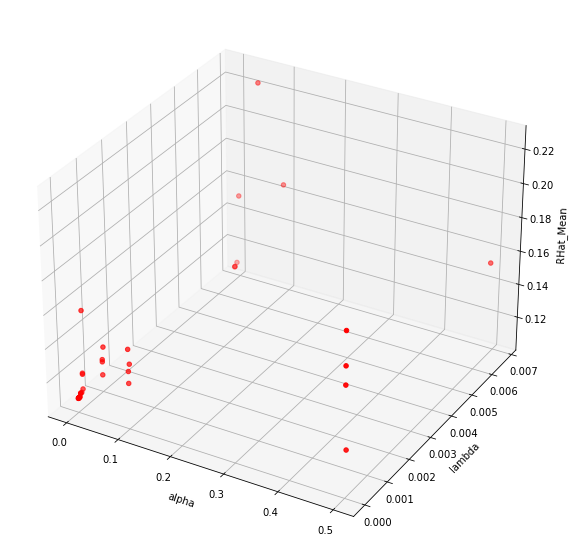

In [499]:
import matplotlib.pyplot as plt
X, Y = np.meshgrid(alpha_set, lambda_set)
Z = np.array(z).reshape(5,8)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z,alpha=0.5)
ax.scatter3D(X, Y, Z,c="r")
ax.set_xlabel('alpha')
ax.set_ylabel('lambda')
ax.set_zlabel('RHat_Mean')

Finally, for the optimal value of $\alpha$ and $\lambda$, we will train our model on complete training data and
evaluate on Test data.

In [500]:
train_features, train_targets, test_features, test_targets = Extract(nor_bank, "y")

In [501]:
beta_grad_ascent = mini_batch_gradient_ascent_reg(train_features, train_targets, 100, best_alpha, best_reg)
beta_grad_ascent

array([[-2.62545161],
       [ 0.02096983],
       [-0.00519946],
       [ 0.13213052],
       [-0.09823944],
       [ 0.00611378],
       [ 0.06788393],
       [-0.38549186],
       [-0.313453  ],
       [-0.48318793],
       [-0.0787235 ],
       [-0.02648223],
       [ 1.00395384],
       [-0.16358842],
       [-0.34141883],
       [ 0.00551926],
       [-0.62841557]])

In [502]:
test_target_ = sigmoid(test_features, beta_grad_ascent)
test_target_pred = np.zeros((len(test_target_), 1))
for i,ele in enumerate(test_target_):
    if ele >= 0.5:
        test_target_pred[i] = 1
    else:
        test_target_pred[i] = 0

Accuracy on the test set

In [503]:
def accuracy(y_pred, Y_test):
    N = Y_test.shape[0]
    sum = 0
    for i in range(N):
        if y_pred[i] == Y_test[i]:
            sum += 1
    return (sum/N)*100

print(f'Accuracy :{accuracy(test_target_pred, test_targets):.2f}%')

Accuracy :88.84%


Log-likelihood for Test data

In [504]:
log_likelihood_reg(test_features, test_targets, beta_grad_ascent, best_reg)

-258.0039952747008

Plot Train and Validation Accuracy and Log-likelihood metrics per k − fold iteration.

In [505]:
def K_Fold(X, y, alpha, reg):
    K = 5
    i_max = 20
    train_acc = []
    test_acc = []
    train_ll = []
    test_ll = []
    for j in range(K):
        xTrain = crossval_split(X,y,K,j)[0]
        yTrain = crossval_split(X,y,K,j)[1]
        xTest = crossval_split(X,y,K,j)[2]
        yTest = crossval_split(X,y,K,j)[3]
        beta = mini_batch_gradient_ascent_reg(xTrain, yTrain, i_max, alpha, reg)
        y_pred_train = pred(xTrain,beta)
        y_pred_test = pred(xTest,beta)
        train_acc.append(accuracy(y_pred_train, yTrain)/100)
        test_acc.append(accuracy(y_pred_test, yTest)/100)
        train_ll.append(log_likelihood_reg(xTrain, yTrain, beta, reg))
        test_ll.append(log_likelihood_reg(xTest, yTest, beta, reg))
    return train_acc, test_acc, train_ll, test_ll

By taking the best found $\alpha$ and $\lambda$ in the k Fold iteration the accuracy and loglikelihood for both training and test set are plotted below:

In [506]:
train_acc, test_acc, train_ll, test_ll = K_Fold(nor_bank_matrix_X, nor_bank_matrix_Y, best_alpha, best_reg)

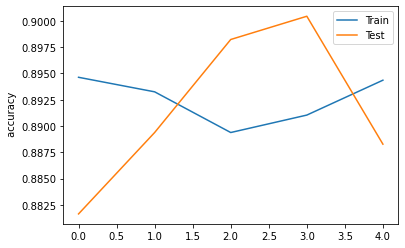

In [507]:
tr_acc = train_acc    
te_acc = test_acc
plt.plot(tr_acc,label = "Train")
plt.plot(te_acc, label = "Test")
plt.ylabel(' accuracy')
plt.legend()
plt.show()

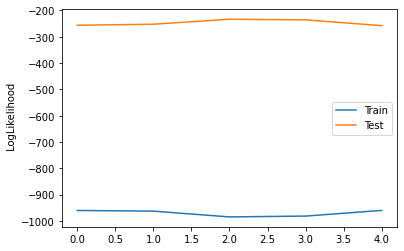

In [508]:
tr_ll = train_ll    
te_ll = test_ll
plt.plot(tr_ll,label = "Train")
plt.plot(te_ll, label = "Test")
plt.ylabel(' LogLikelihood')
plt.legend()
plt.show()

# Exercise 3: Implementing Hyperband for Logistic Regression

We have taken here possible values of alpha, lambda and batch size.

In [510]:
alphaSet = [0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]
lambdaSet = [np.exp(-5),  np.exp(-8), np.exp(-10), np.exp(-15), np.exp(-18), np.exp(-20), np.exp(-22), np.exp(-25)]
batchsizeSet = [15, 18, 20, 25, 30, 35, 40, 50]
hyperparaSet = [[a, l, b] for a in alphaSet for l in lambdaSet for b in batchsizeSet]
hyperparaSet

[[0.1, 0.006737946999085467, 15],
 [0.1, 0.006737946999085467, 18],
 [0.1, 0.006737946999085467, 20],
 [0.1, 0.006737946999085467, 25],
 [0.1, 0.006737946999085467, 30],
 [0.1, 0.006737946999085467, 35],
 [0.1, 0.006737946999085467, 40],
 [0.1, 0.006737946999085467, 45],
 [0.1, 0.00033546262790251185, 15],
 [0.1, 0.00033546262790251185, 18],
 [0.1, 0.00033546262790251185, 20],
 [0.1, 0.00033546262790251185, 25],
 [0.1, 0.00033546262790251185, 30],
 [0.1, 0.00033546262790251185, 35],
 [0.1, 0.00033546262790251185, 40],
 [0.1, 0.00033546262790251185, 45],
 [0.1, 4.5399929762484854e-05, 15],
 [0.1, 4.5399929762484854e-05, 18],
 [0.1, 4.5399929762484854e-05, 20],
 [0.1, 4.5399929762484854e-05, 25],
 [0.1, 4.5399929762484854e-05, 30],
 [0.1, 4.5399929762484854e-05, 35],
 [0.1, 4.5399929762484854e-05, 40],
 [0.1, 4.5399929762484854e-05, 45],
 [0.1, 3.059023205018258e-07, 15],
 [0.1, 3.059023205018258e-07, 18],
 [0.1, 3.059023205018258e-07, 20],
 [0.1, 3.059023205018258e-07, 25],
 [0.1, 3.059

In [486]:
def resplit(file):
    r, c = np.shape(file)
    size = int(0.7*r)
    train = file.iloc[0:size]
    val = file.iloc[size: size +int( 0.15*r)]
    test = file.iloc[size + int(0.15*r) :]
    return train, val, test

def extract_data(f): 
    tr, va, te = resplit(f)
    x_tr = tr.loc[:, tr.columns != "y"]
    x_tr = x_tr.to_numpy()
    bias_col1 = np.ones(shape=(tr.shape[0],1))
    X_tr = np.append(bias_col1,x_tr,axis=1)
    y_tr = tr.loc[:, tr.columns == "y"]
    Y_tr = y_tr.to_numpy()

    x_va = va.loc[:, va.columns != "y"]
    x_va = x_va.to_numpy()
    bias_col2 = np.ones(shape=(va.shape[0],1))
    X_va = np.append(bias_col2, x_va, axis=1)
    y_va = va.loc[:, va.columns == "y"]
    Y_va = y_va.to_numpy()

    x_te = te.loc[:, te.columns != "y"]
    x_te = x_te.to_numpy()
    bias_col3 = np.ones(shape=(te.shape[0],1))
    X_te = np.append(bias_col3, x_te ,axis=1)
    y_te = te.loc[:, te.columns == "y"]
    Y_te = y_te.to_numpy()
    return X_tr, Y_tr, X_va, Y_va, X_te, Y_te

In [527]:
def mini_batch_gradient_ascent_reg_para(X, Y, i_max, alpha, reg, batch_size):
    m, n = np.shape(X)
    beta = np.zeros((n, 1))
    beta_new = np.zeros((n, 1))
    l = int(m/batch_size)
    for k in range(i_max):
        for i in range(l):
            beta_new = beta + alpha*(log_likelihood_reg_grad(X[i*batch_size:(i+1)*batch_size][:], Y[i*batch_size:(i+1)*batch_size][:], beta, reg))
            beta = beta_new
    return beta_new

Hyperband optimization

In [534]:
import math
def hyperband(X, Y):
    max_iter = 81 
    eta = 3 
    logeta = lambda x: np.log(x)/np.log(eta)
    s_max = int(logeta(max_iter)) 
    B = (s_max+1)*max_iter 

    for s in reversed(range(s_max+1)):
        n = int(math.ceil(int(B/max_iter/(s+1))*eta**s)) 
        r = max_iter*eta**(-s) 
        T = [hyperparaSet[i] for i in range(len(hyperparaSet))] 
        for i in range(s+1):
            n_i = int(n*eta**(-i))
            r_i = int(r*eta**(i))
            val_losses = [log_likelihood_reg(X, Y, mini_batch_gradient_ascent_reg_para(X, Y, r_i, alpha, reg, batch_size), reg)
                          for alpha, reg, batch_size in T ]
            #T = [T[:,-1].argsort()]

    return val_losses

In [535]:
X_tr, Y_tr, X_va, Y_va, X_te, Y_te = extract_data(nor_bank)
val = hyperband(X_tr, Y_tr)
val

[-989.6624261318302,
 -975.7845877653674,
 -1100.119574775414,
 -972.090413012198,
 -1000.7326636698785,
 -1002.7706985022814,
 -1035.94845699472,
 -1038.6948080258483,
 -996.3486092303933,
 -981.1987417162424,
 -1106.9810879160264,
 -976.1434775220596,
 -1003.8359230610868,
 -1005.3664294498714,
 -1040.0049214725402,
 -1040.5471248873355,
 -996.6867957488843,
 -981.4695207507955,
 -1107.3170966748733,
 -976.3416194213024,
 -1003.983065044594,
 -1005.4888164240697,
 -1040.1973307363996,
 -1040.635599218635,
 -996.739683422967,
 -981.5118408947284,
 -1107.3695472041002,
 -976.3725465230858,
 -1004.0059969457626,
 -1005.5078832079869,
 -1040.227313441063,
 -1040.6493925793097,
 -996.740024606887,
 -981.5121138836731,
 -1107.36988548314,
 -976.3727459847842,
 -1004.006144812718,
 -1005.5080061460602,
 -1040.2275067684704,
 -1040.6494815242568,
 -996.7400400642075,
 -981.512126251418,
 -1107.369900808832,
 -976.3727550213657,
 -1004.0061515118009,
 -1005.5080117157448,
 -1040.227515527133,

Best Found hyperparameters are:

In [539]:
T[np.argmin(val)]

[0.0001, 4.5399929762484854e-05, 50]

In [542]:
beta_hyper = mini_batch_gradient_ascent_reg_para(X_tr, Y_tr, 100, 0.0001, 4.5399929762484854e-05, 50)
te_target_ = sigmoid(X_te, beta_hyper)
te_target_pred = np.zeros((len(te_target_), 1))
for i,ele in enumerate(te_target_):
    if ele >= 0.5:
        te_target_pred[i] = 1
    else:
        te_target_pred[i] = 0

In [543]:
print(f'Accuracy :{accuracy(te_target_pred, Y_te):.2f}%')

Accuracy :88.66%
